# Auswertung 200218_7

### imports

In [1]:
import sys
sys.path.append("../toolbox/")
from workflow  import *

In [2]:
%load_ext autoreload

In [30]:
%autoreload

## define master data

In [4]:
measurement_id = "200218_7"
campaign_id    = "01_Messkampagne_1"
path_to_raw_data_folder = "C:\\Users\\joerg_j\\switchdrive\\PSI\\22_e-Instrumentation\\HERO\\IPA\\Rohdaten"
path_to_hdf5_folder = "HDF5"

In [5]:
rawfolder, hdf5file = paths(measurement_id, campaign_id, path_to_raw_data_folder, path_to_hdf5_folder)

### import data

In [6]:
traceName = "Trace"
pulseMin = None
pulseMax = None


C1 = readChannel("C1", rawfolder, traceName, pulseMin, pulseMax)
C3 = readChannel("C3", rawfolder, traceName, pulseMin, pulseMax)

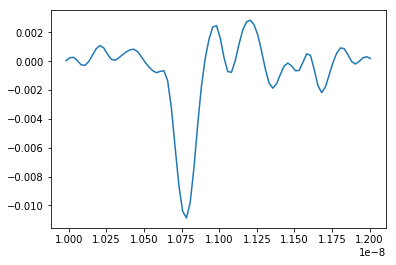

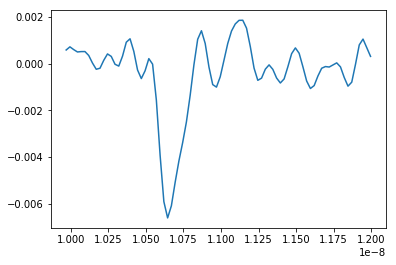

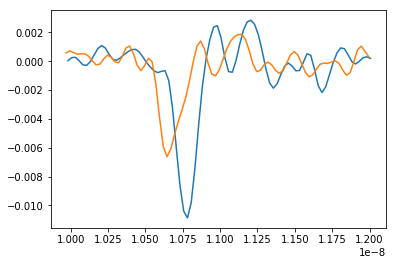

In [31]:
pulsnr = 123
viewImport(C1, C3, pulsnr)

### define area of interest

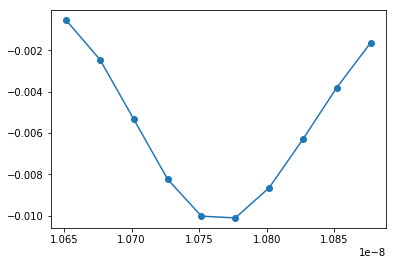

In [10]:
areaMinC1 = 27
areaMaxC1 = 37
pulsnr = 125

viewSelection(C1, pulsnr, areaMinC1, areaMaxC1)

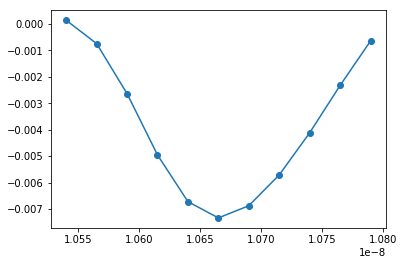

In [11]:
areaMinC3 = 23
areaMaxC3 = 34
pulsnr = 125

viewSelection(C3, pulsnr, areaMinC3, areaMaxC3)

## algorithm 1: fit gaussian function

In [12]:
# [A, mu, sigma]
gaussParamsC1 = [-1.5e-11, 1.078e-8, 5e-11]
gaussParamsC3 = [-1.0e-11, 1.07e-8, 5e-11]

In [13]:
C1["fit"] = fitChannel(C1["data"], areaMinC1, areaMaxC1, gaussParamsC1)

In [14]:
C3["fit"] = fitChannel(C3["data"], areaMinC3, areaMaxC3, gaussParamsC3)

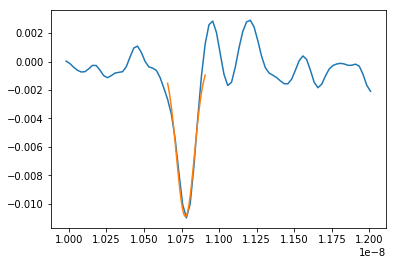

parameter: [-1.63051295e-12  1.07756733e-08  5.96935914e-11] [A, mu, sigma]


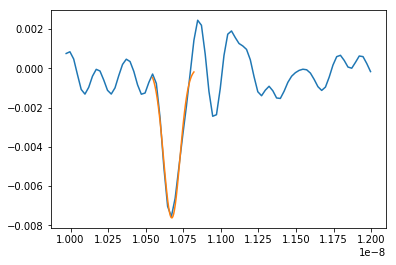

parameter: [-1.03325841e-12  1.06733693e-08  5.40816796e-11] [A, mu, sigma]


In [15]:
pulsnr = 125

viewFit(C1, pulsnr, areaMinC1, areaMaxC1, gaussParamsC1)
viewFit(C3, pulsnr, areaMinC3, areaMaxC3, gaussParamsC3)

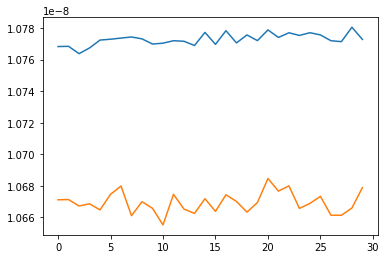

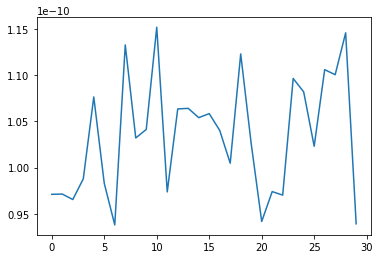

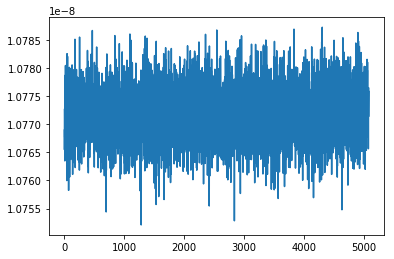

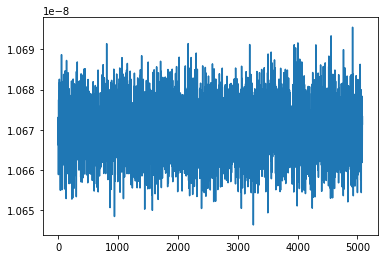

In [16]:
pulseMin = 100
pulseMax = 130

viewMu(C1, C3, pulseMin, pulseMax)

### histogram

In [17]:
JitterGauss = jitter(C1, C3, axis = 1)

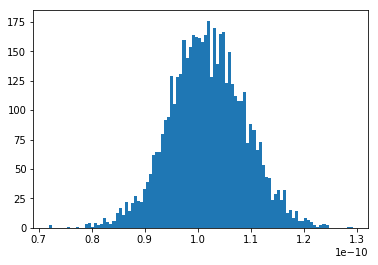

In [18]:
bins = 100

HistGauss = histogram(JitterGauss, bins)

### fit gauss to histogram

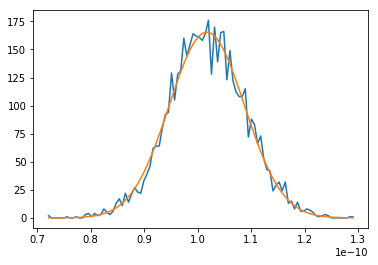

parameter: [2.90964930e-09 1.01695536e-10 7.01811717e-12] [A, mu, sigma]


In [19]:
# [A, mu, sigma]
gaussParamsHist = [1e-9, 1.01e-10, 1e-12]

HistFitParamsGauss = fitSingle(np.array([HistGauss[0], HistGauss[1]]), None, None, gaussParamsHist)

### result GAUSSFIT

In [20]:
DoubleJitter, SingleJitter, Mu = result(HistFitParamsGauss)

σ_0: 7.018117170085572 ps
σ_1: 4.96255824212925 ps
σ_1 = σ_0 / sqrt(2)

μ: 101.69553601801066 ps

coma separated [σ_0, σ_1, μ]
7.018117170085571e-12,4.96255824212925e-12,1.0169553601801066e-10

 tab separated [σ_0, σ_1, μ]
7.018117170085571e-12	4.96255824212925e-12	1.0169553601801066e-10


## algorithm 2: min

In [21]:
C1["min"] = minChannel(C1)
C3["min"] = minChannel(C3)

## algorithm 3: threshold

In [22]:
factor = 0.5

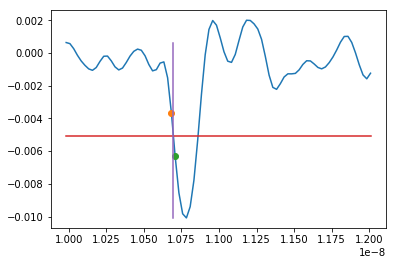

xt: 1.069670961522054e-08 ps, yt -0.005043037389555138 ps


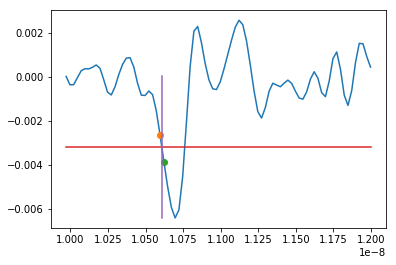

xt: 1.060840966022021e-08 ps, yt -0.00320650983348969 ps


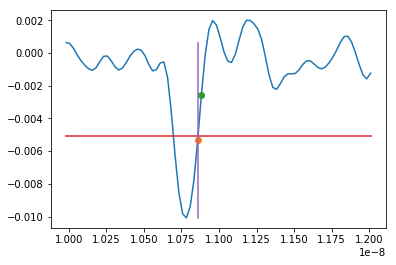

xt: 1.0861147012182373e-08 ps, yt -0.005043037389555138 ps


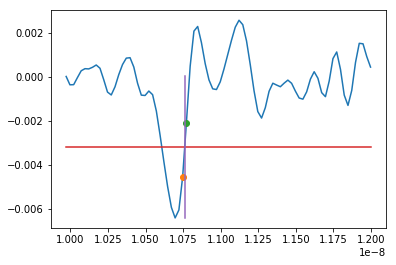

xt: 1.0760559181290642e-08 ps, yt -0.00320650983348969 ps


In [23]:
C1["thres5f"] = threshold(C1, factor, show=120)
C3["thres5f"] = threshold(C3, factor, show=120)
C1["thres5r"] = threshold(C1, factor, fallingEdge = False, show=120)
C3["thres5r"] = threshold(C3, factor, fallingEdge = False, show=120)

In [24]:
C1["thres5c"] = (C1["thres5r"] + C1["thres5f"]) / 2
C3["thres5c"] = (C3["thres5r"] + C3["thres5f"]) / 2

### histogram

In [25]:
JitterThres5f = jitter(C1, C3, storage = "thres5f", axis = 0)
JitterThres5c = jitter(C1, C3, storage = "thres5c", axis = 0)
JitterThres5r = jitter(C1, C3, storage = "thres5r", axis = 0)

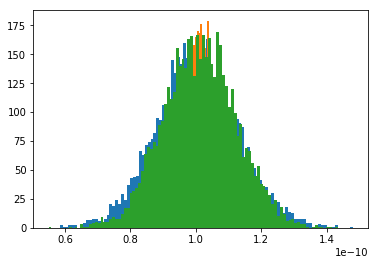

In [26]:
bins = 100

HistThres5f = histogram(JitterThres5f, bins)
HistThres5c = histogram(JitterThres5c, bins)
HistThres5r = histogram(JitterThres5r, bins)

### fit gauss to histogram

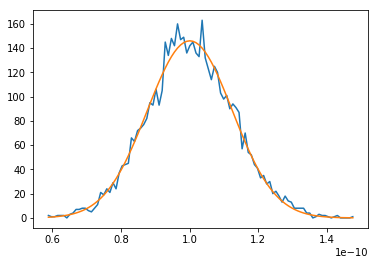

parameter: [4.53370091e-09 1.00035341e-10 1.23859018e-11] [A, mu, sigma]


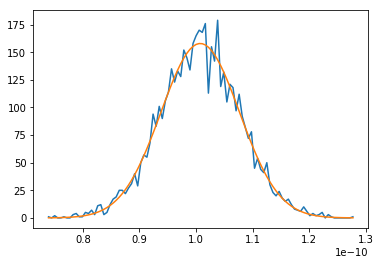

parameter: [2.74807643e-09 1.00753650e-10 6.94038553e-12] [A, mu, sigma]


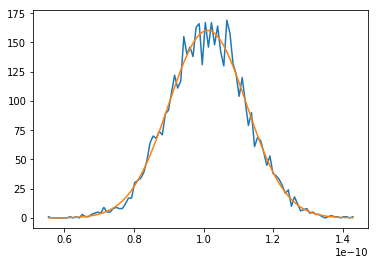

parameter: [4.49322242e-09 1.01170095e-10 1.11803961e-11] [A, mu, sigma]


In [27]:
# [A, mu, sigma]
gaussParamsThres5f = [1e-9, 1.00e-10, 1e-12]
gaussParamsThres5c = [1e-9, 1.00e-10, 1e-12]
gaussParamsThres5r = [1e-9, 1.00e-10, 1e-12]

HistFitParamsThres5f = fitSingle(np.array([HistThres5f[0], HistThres5f[1]]), None, None, gaussParamsThres5f)
HistFitParamsThres5c = fitSingle(np.array([HistThres5c[0], HistThres5c[1]]), None, None, gaussParamsThres5c)
HistFitParamsThres5r = fitSingle(np.array([HistThres5r[0], HistThres5r[1]]), None, None, gaussParamsThres5r)

### result

In [33]:
print("-- THRESHOLD 50% FALLING EDGE --")
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5f)

print("\n--------------------------\n\n-- THRESHOLD 50% CENTER --")
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5c)

print("\n-------------------------------\n\n-- THRESHOLD 50% RISING EDGE --")
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5r)

-- THRESHOLD 50% FALLING EDGE --
σ_0: 12.385901817449302 ps
σ_1: 8.758155166229184 ps
σ_1 = σ_0 / sqrt(2)

μ: 100.03534119362656 ps

coma separated [σ_0, σ_1, μ]
1.2385901817449302e-11,8.758155166229184e-12,1.0003534119362657e-10

 tab separated [σ_0, σ_1, μ]
1.2385901817449302e-11	8.758155166229184e-12	1.0003534119362657e-10

--------------------------

-- THRESHOLD 50% CENTER --
σ_0: 6.940385526086577 ps
σ_1: 4.907593669544783 ps
σ_1 = σ_0 / sqrt(2)

μ: 100.75365007922979 ps

coma separated [σ_0, σ_1, μ]
6.940385526086577e-12,4.907593669544783e-12,1.0075365007922979e-10

 tab separated [σ_0, σ_1, μ]
6.940385526086577e-12	4.907593669544783e-12	1.0075365007922979e-10

-------------------------------

-- THRESHOLD 50% RISING EDGE --
σ_0: 11.180396073208257 ps
σ_1: 7.905733879717006 ps
σ_1 = σ_0 / sqrt(2)

μ: 101.17009477177284 ps

coma separated [σ_0, σ_1, μ]
1.1180396073208258e-11,7.905733879717006e-12,1.0117009477177284e-10

 tab separated [σ_0, σ_1, μ]
1.1180396073208258e-11	7.905733